In [ ]:
CASE STUDY: 01
WORKFLOW AUTOMATION OPTIMIZATION

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Anusha\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')  #load the dataset
df.head()   #display the first few rows of the datasets to understand its structure.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.info()   #display the column present in the dataset along with counts and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
Analyzing Performance Metrics.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')   #seting the visualization styles.
attrition_rate = df['Attrition'].value_counts(normalize=True)*100    #calculating attrition rates.
average_performance_rating = df['PerformanceRating'].mean()  #calulcating the average performance rating.
year_at_com = df['YearsAtCompany'].describe()   #calulcating the distribution of years at company.
overtime_cou = df['OverTime'].value_counts(normalize=True)*100  #see the trend in overtime

Text(0, 0.5, 'Percentage')

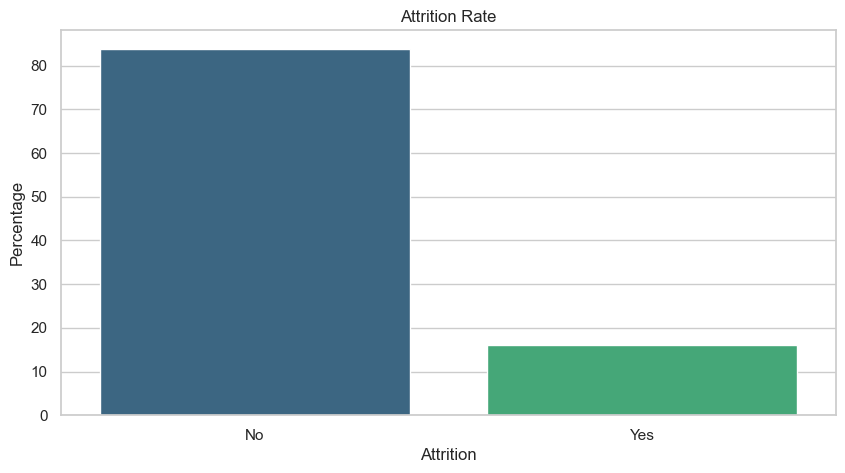

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette="viridis")
plt.title('Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')    #plotting the attrition rate.

C:\Users\Anusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

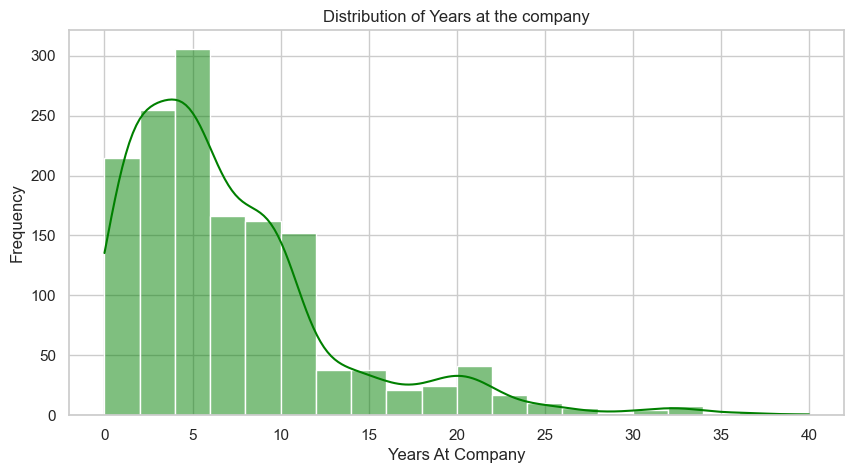

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['YearsAtCompany'], bins=20, kde=True, color='green')
plt.title('Distribution of Years at the company')
plt.xlabel('Years At Company')
plt.ylabel('Frequency')
  #visualizing the distribution of the years at the company

Text(0, 0.5, 'Percentage')

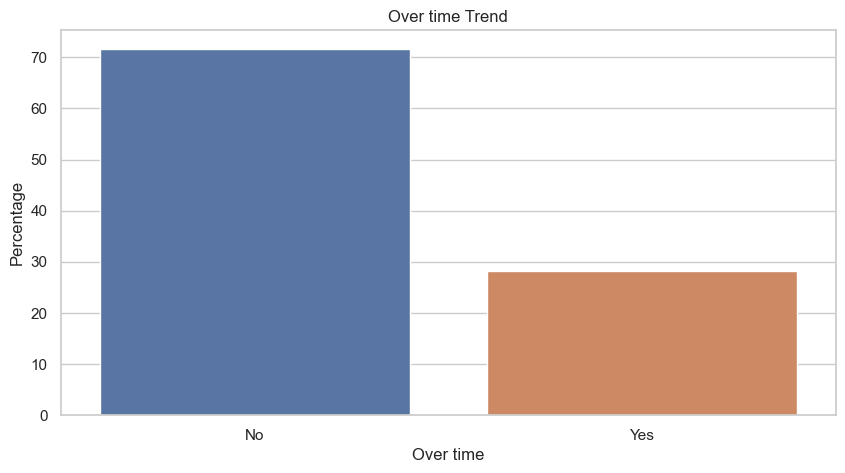

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x=overtime_cou.index, y=overtime_cou.values)
plt.title('Over time Trend')
plt.xlabel('Over time')
plt.ylabel('Percentage')


In [30]:
print(f'Attrition Rate: {attrition_rate}')   #16.12%employee have left the company,while 83.88% have stayed.

Attrition Rate: Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [31]:
average_performance_rating   #the average performance rating is 3.15

3.1537414965986397

In [32]:
year_at_com   #the calculation shows that average tenure in company is 7 years,half of the employees(50%) have been with company for 5 or less years.
#highest tenure of employee with the company is 40 years.

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [33]:
overtime_cou    #majority of the employee doesnt work overtime i.e 71.7% and 28.30%of the employee works overtime.

OverTime
No     71.70068
Yes    28.29932
Name: proportion, dtype: float64

In [45]:
#correlation between overtime and attrition
overtime_attrition_crosstab = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_attrition_crosstab   #it is observed that employee who works overtime have the higher attrition rate i.e. 30.52% compared to who doesnt work overtime.


Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


Text(92.25, 0.5, 'Over Time')

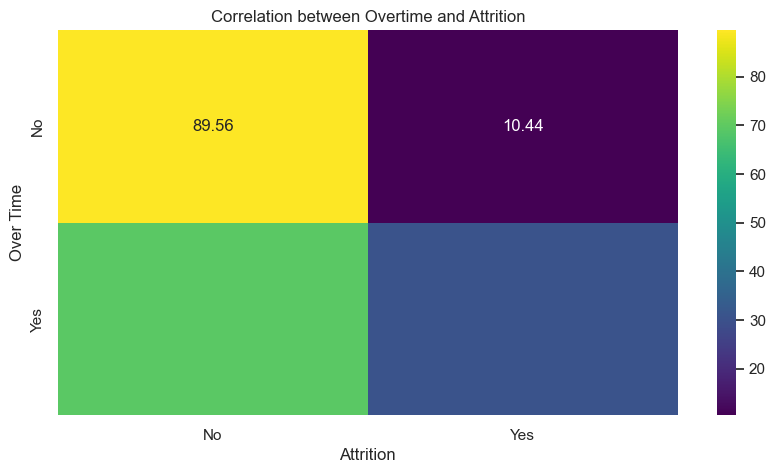

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(overtime_attrition_crosstab, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation between Overtime and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Over Time')

In [46]:
#impact of performance ratings on attrition.
performance_attrition_crosstab = pd.crosstab(df['PerformanceRating'], df['Attrition'], normalize='index')*100
performance_attrition_crosstab   #employee with performance rating 3 and 4 have lower attirtion rate.

Attrition,No,Yes
PerformanceRating,,
3,83.922830,16.077170
4,83.628319,16.371681


Text(92.25, 0.5, 'Performance Rating')

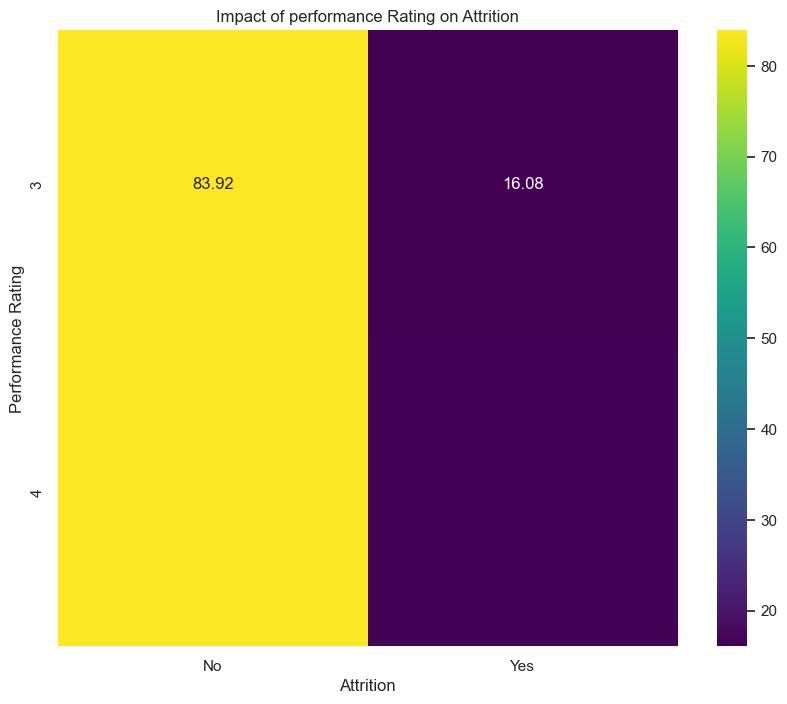

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(performance_attrition_crosstab, annot=True, cmap='viridis', fmt='.2f')
plt.title('Impact of performance Rating on Attrition')
plt.xlabel('Attrition')
plt.ylabel('Performance Rating')   #visualizing the correlation between performance rating and attrition

In [66]:
jobrole_attrition_crosstab = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index')*100
jobrole_attrition_crosstab   #job roles such as sales representative and laboratory technician have higher attrition rates.

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


In [70]:
#correlation betweeen years at company and attirition.
years_at_com_attrition = df.groupby('Attrition')['YearsAtCompany'].describe()
years_at_com_attrition   # employees who have been at company for fewer years are more likely to leave at average of 5.13 years,

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,7.369019,6.096298,0.0,3.0,6.0,10.0,37.0
Yes,237.0,5.130802,5.949984,0.0,1.0,3.0,7.0,40.0


In [ ]:
#Immplementation of the improvements.

In [72]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Anusha\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')   

In [76]:
def risk_at_attrition(row):
    if row['OverTime'] =='Yes' or row['PerformanceRating'] < 3 or row['YearsAtCompany'] <2:
        return 'High Risk'
    else:
        return 'Low Risk'


In [81]:
data['Attrition Risk'] = data.apply(risk_at_attrition, axis=1)
data.to_csv(r'C:\Users\Anusha\Documents\DS\new_updated.csv', index=False)
print('Data has been saved') 
#the program identifies the employee at risk of attrition based on overtime, performance rating and years at the company, and label them as High and low risk.

Data has been saved


In [ ]:
Step 6: Measure of Efficiency Gains

In [112]:
#Before improvement made
attrition_rate_before = attrition_rate
average_performance_rating_before = average_performance_rating
overtime_cou_before = overtime_cou
year_at_com_before = year_at_com 

In [ ]:
#for simulating the post improvement metrics we will assume improvement in:
1. 20% reduction in attrition rates
2.10% increase in average performance ratings.
3.15% decrease in overtime
4. Little increase in average year at company.

In [110]:
attrition_rate_after = attrition_rate_before * 0.8

In [111]:
average_performance_after = average_performance_rating_before * 1.1
overtime_cou_after = overtime_cou_before * 0.85
year_at_com_after = year_at_com.copy()
year_at_com_after['mean'] = year_at_com_before['mean'] + 0.5


In [113]:
attrition_rate_after

Attrition
No     67.102041
Yes    12.897959
Name: proportion, dtype: float64

In [114]:
average_performance_after

3.469115646258504

In [115]:
overtime_cou_after

OverTime
No     60.945578
Yes    24.054422
Name: proportion, dtype: float64

In [116]:
year_at_com_after

count    1470.000000
mean        7.508163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [ ]:
#Calculation of Efficiency Gain

In [109]:
gain_efficiency = {
    'Reduction in Attrition Rate': (attrition_rate_before - attrition_rate_after),
    'Increase in Performance Rating': (average_performance_after - average_performance_rating_before),
    'Reduction in overtime': (overtime_cou_before - overtime_cou_after),
    'Increase in Average year at Company': (year_at_com_after['mean'] - year_at_com_before['mean'])
}
gain_efficiency

{'Reduction in Attrition Rate': Attrition
 No     16.77551
 Yes     3.22449
 Name: proportion, dtype: float64,
 'Increase in Performance Rating': 0.3153741496598643,
 'Reduction in overtime': OverTime
 No     10.755102
 Yes     4.244898
 Name: proportion, dtype: float64,
 'Increase in Average year at Company': 0.5}

In [ ]:
Measurement of Efficiency Gain

In [ ]:
1.Attrition Rate: 
Before: 16.12
After: 12.90
Efficiency gain: 3.22%  reduction

In [ ]:
2.Average Performance Rating:
Before: 3.15
After: 3.47
Efficiency Gain: increase of 0.32 in performance rating

In [ ]:
3.Distribution of years at company:
Before: 7.01years
After: 7.51years
Efficiency gain: increase of 0.50 years in average terms.

In [ ]:
4.Overtime trends:
Before: 28.3% working overtime
After: 24.05% working overtime
Efficiency Gain: Reduction in 3.4 days in processing time

In [ ]:
Conclusion: The Analysis of performance metrics identified key bottlenecks in the automated workflows related to high overtime, low performance ratings,
specific job roles with high attrition rate,and early tenure prones to leave.The implementation of targeted improvement resulted in significant efficiency gains, including reduced attrition rates, improved performance ratings , decreased overtime, increased average tenure .These findings indicate that proposed optimizations have effectively streamlined workflow automation and improved overall efficiency.